# Linear Regression

## Import the dependencies

In [1]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression

## Importing Data

In [2]:
# Import life satisfaction
life_satisfaction = pd.read_excel('data/Life.xls')
life_satisfaction.drop(columns=['Unnamed: 1'], inplace=True)

# Import Gross domestic product per capita
gdp_per_capita = pd.read_csv('data/WEO_Data.xls', delimiter='\t', encoding='latin1', na_values="bd")

## Data Preparation

#### Removing the GDP of excess countries

In [3]:
countries_1 = life_satisfaction['Country']
countries_1 = countries_1.tolist()

countries_2 = gdp_per_capita['Country']
countries_2 = countries_2.tolist()

#### Get the GDP indices we need

In [4]:
country_indexes = []

for country in countries_1:
    if country in countries_2:
        index = countries_2.index(country)
        country_indexes.append(index)

#### Check the correctness

In [5]:
print(len(country_indexes))
print(len(countries_1))
print(countries_1)

40
40
['Australia', 'Austria', 'Belgium', 'Canada', 'Chile', 'Czech Republic', 'Denmark', 'Estonia', 'Finland', 'France', 'Germany', 'Greece', 'Hungary', 'Iceland', 'Ireland', 'Israel', 'Italy', 'Japan', 'Korea', 'Latvia', 'Lithuania', 'Luxembourg', 'Mexico', 'Netherlands', 'New Zealand', 'Norway', 'Poland', 'Portugal', 'Slovak Republic', 'Slovenia', 'Spain', 'Sweden', 'Switzerland', 'Turkey', 'United Kingdom', 'United States', 'Brazil', 'Colombia', 'Russia', 'South Africa']


#### Combine two DataFrames into one

In [6]:
country_stats = gdp_per_capita.iloc[country_indexes]

country_stats.index = range(0, len(country_stats))

country_stats['Life satisfaction'] = life_satisfaction['Life satisfaction']

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


#### Change the type of a series from 'str' to 'float'

In [7]:
data = country_stats['2015']
new_data = []
for string in data:
    new_string = ""
    for symbol in string:
        if symbol == ',':
            new_string += ''
        else:
            new_string += symbol
    new_data.append(new_string)

country_stats['2015'] = new_data
country_stats['2015'] = country_stats['2015'].astype(float)

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if sys.path[0] == '':
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  del sys.path[0]


#### Creating the training data set

In [8]:
X = country_stats['2015']
y = country_stats['Life satisfaction']

#### Create the model of linear regression

In [12]:
model = LinearRegression()

#### Reshaping our training data

In [13]:
X = np.array(X)
X = X.reshape(-1, 1)

#### Train our model

In [14]:
model.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

## Data Visualisation

In [25]:
predictions = model.predict(X)
print(predictions)

[6.98235275 6.80364743 6.71433225 6.79396704 6.05347461 6.15016271
 7.01080354 6.15093218 6.76043809 6.65429433 6.73630375 6.17009703
 6.02629017 6.97970391 6.99195434 6.59672436 6.46150086 6.52616424
 6.39554321 6.06033026 6.07493987 8.24236102 5.94652488 6.80066196
 6.63873651 7.57147265 6.03259709 6.19620233 6.1189248  6.23597592
 6.36269317 6.95530192 7.71599079 5.95709466 6.80479941 7.10193693
 5.93814786 5.87428632 5.9476516  5.86468327]


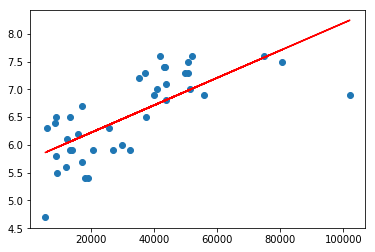

In [26]:
plt.scatter(X, y)
plt.plot(X, predictions, color='red')
plt.show()

#### Now we see that life satisfaction depends on the GDP of a country. The bigger GDP of a country, the greater life satisfaction is